<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/5_Aprendizaje_Profundo/2_DL_Keras_API_funcional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creación de arquitecturas de aprendizaje profundo mediante API funcional de Keras.

- Se presentan los consideraciones básicas respecto a la [API funcional de Keras](https://keras.io/guides/functional_api/) para la implementación de modelos de redes profundas con TensorFlow.



In [1]:
import tensorflow as tf #importar tensorflow
print(tf.__version__)

2.7.0


- Se utilizará la base de datos Fashion Mnist nuevamente, normalizando las imágenes de 0 a 1.

In [2]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train

4431872/4422102 [==============================] - 0s 0us/step


- Se presenta un ejemplo de la base de datos

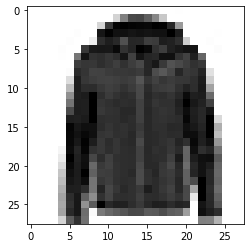

In [3]:
import matplotlib.pyplot as plt
plt.imshow(images[5000,:,:],cmap= 'binary')
plt.show()

In [4]:
import numpy as np
print(np.unique(labels)) #etiquetas
print(images.shape) #tamaño de las imágenes

[0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28)


In [5]:
Xtrain, ytrain = train
Xtrain = Xtrain/255 # tipo flotante, normalizados de 0 a 1
Xtest, ytest = test
Xtest = Xtest/255 # tipo flotante, normalizados de 0 a 1

- En el cuaderno introductorio a redes neuronales con tensorflow se planteó la construcción de modelos mediante secuencia de capas:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 red1 (Dense)                (None, 200)               157000    
                                                                 
 hred2 (Dense)               (None, 50)                10050     
                                                                 
 output (Dense)              (None, 10)                510       
                                                                 
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


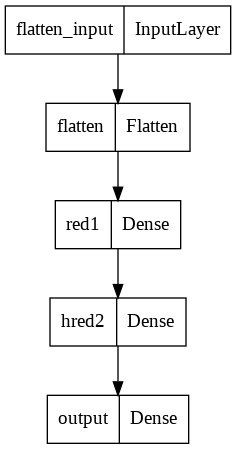

In [6]:
#definir arquitectura secuencial
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2])),
    tf.keras.layers.Dense(200,activation="relu", name='red1'),
    tf.keras.layers.Dense(50, activation="tanh",name='hred2'),
    tf.keras.layers.Dense(10,activation='softmax',name='output')
])

model.summary() # resumen del modelo
tf.keras.utils.plot_model(model) #diagrama del modelo

- Aunque la implementacióm mediante secuencia es intuitiva, no permite realizar conexiones flexibles entre capas.

- En ese sentido, Keras permite crear capas bajo el principio de funciones y argumentos, como se muestra a continuación#

**Nota**: a diferencia de la estructura secuencial, en la API funcional se debe indicar la capa o capas de entrada y la capa o capas de salida para crear el grafo de forma apropiada.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 entrada (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 h1 (Dense)                  (None, 200)               157000    
                                                                 
 h2 (Dense)                  (None, 50)                10050     
                                                                 
 output (Dense)              (None, 10)                510       
                                                                 
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


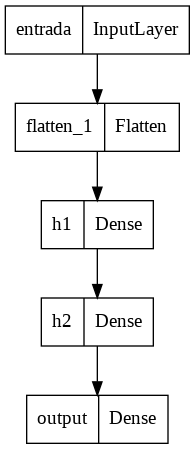

In [7]:
#arquitectura funcional
#capa de entrada
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
#capa de aplanamiento de las imágenes
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)#argumento de entrada
#capas densas
h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)#argumento de entrada
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa de salida
output = tf.keras.layers.Dense(10,activation="softmax",name='output')(h2)
#crear modelo según conexiones tipo funcionales
model_fun = tf.keras.Model(inputs=input_l,outputs=output)

#resumen y gráfica del modelo
model_fun.summary()
tf.keras.utils.plot_model(model_fun)


# La API funcional permite realizar conexiones más flexibles

- En el siguiente ejemplo se crea un modelo con una entrada y dos salidas con interconexiones flexibles:

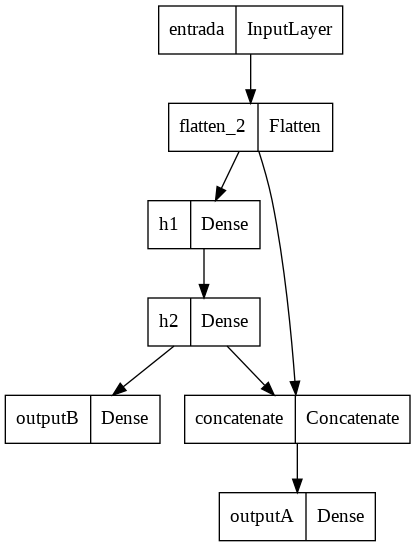

In [8]:
#arquitectura funcional 2 
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)

h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2,flatten])
#se crean dos salidas:
output_A = tf.keras.layers.Dense(10,activation="softmax",name='outputA')(concat)#desde concatenación
output_B = tf.keras.layers.Dense(10,activation="softmax",name='outputB')(h2)#desde h2
#las entradas y salidas se ingresan como listas
model_fun = tf.keras.Model(inputs=input_l,outputs=[output_A, output_B])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun)

**Nota**: si se cuenta con varias salidas se puede definir un mismo costo para 

In [9]:
model_fun.compile(loss="sparse_categorical_crossentropy", #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics="accuracy") #f1, precision, recall, crossentropy


In [10]:
history = model_fun.fit(Xtrain, [ytrain,ytrain] , epochs=10,batch_size=64, # 32, 64, 128, 256
                    validation_data=(Xtest, [ytest,ytest]))

Epoch 1/10
938/938 [==============================] - 9s 6ms/step - loss: 1.0218 - outputA_loss: 0.5264 - outputB_loss: 0.4954 - outputA_accuracy: 0.8173 - outputB_accuracy: 0.8227 - val_loss: 0.8788 - val_outputA_loss: 0.4320 - val_outputB_loss: 0.4467 - val_outputA_accuracy: 0.8465 - val_outputB_accuracy: 0.8390
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.7464 - outputA_loss: 0.3753 - outputB_loss: 0.3711 - outputA_accuracy: 0.8640 - outputB_accuracy: 0.8651 - val_loss: 0.7960 - val_outputA_loss: 0.4089 - val_outputB_loss: 0.3871 - val_outputA_accuracy: 0.8512 - val_outputB_accuracy: 0.8617
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.6763 - outputA_loss: 0.3404 - outputB_loss: 0.3359 - outputA_accuracy: 0.8762 - outputB_accuracy: 0.8772 - val_loss: 0.7435 - val_outputA_loss: 0.3753 - val_outputB_loss: 0.3681 - val_outputA_accuracy: 0.8699 - val_outputB_accuracy: 0.8699
Epoch 4/10
938/938 [==============================] 

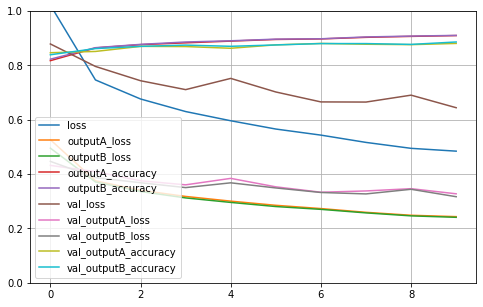

In [11]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

In [12]:
yestA,yestB = model_fun.predict(Xtest)

In [13]:
print(yestA[0].argmax(),ytest[0])


9 9


# Grafiquemos los pesos respecto a las dimensiones de la imagen original

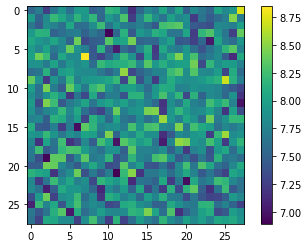

In [14]:
plt.imshow(abs(model.layers[1].get_weights()[0]).sum(axis=1).reshape(28,28))
plt.colorbar()
plt.show()

In [15]:
model.layers[1].get_weights()[1].shape # accediendo  a pesos por lista

(200,)

# Salidas parciales de la red

Nos permite identificar que ve la red en etapas intermedias

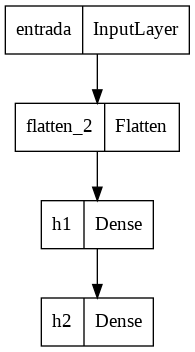

In [16]:
#crear nuevo modelo con salida parcial
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('h2').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_B) # modleo ya esta ajustado!


In [17]:
z = model_B.predict(Xtrain) # salida en h2
z.shape


(60000, 50)

# Dado que se fijaron 50 unidades, se puede utilizar técnicas de reducción de dimensión para visualizar los patrones intermedios de la red en 2D

In [18]:
from sklearn.decomposition import PCA
zpca = PCA(n_components=2).fit_transform(z)
zpca.shape

(60000, 2)

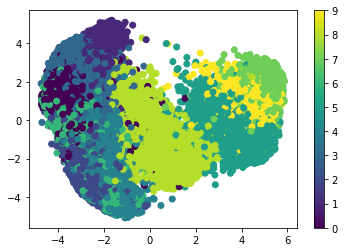

In [19]:
plt.scatter(zpca[:,0],zpca[:,1],c=ytrain)
plt.colorbar()
plt.show()

In [20]:
#plot mnist 2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def plot_mnist_2d(Z,y,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(16,10))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

In [ ]:
Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytrain.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytrain[ind],Xtrain[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')